In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
cv2.__version__

'4.2.0'

In [37]:
coins = cv2.imread('coins.jpg' )
# coins = cv2.cvtColor( coins , cv2.COLOR_BGR2RGB)

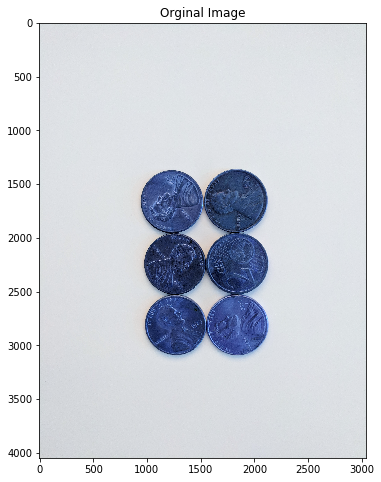

In [38]:
plt.figure(figsize = (15 , 8 ))

plt.title('Orginal Image' )
plt.imshow(coins)

- Steps to follow 
    - Blur the image 
    - Convert to gray scale
    - Applying Threshold
    - Finding Contour
    
    - Apply Noise Removal Technique

# Blur the image 

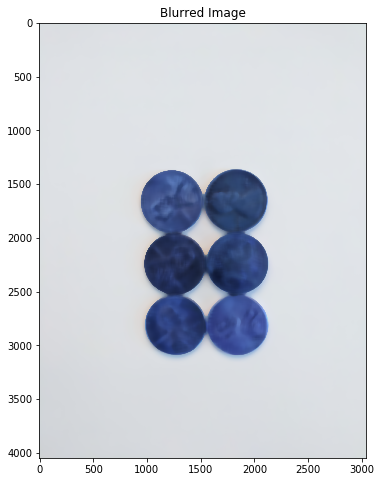

In [39]:
blur_coins = cv2.medianBlur( coins ,  51)

plt.figure(figsize = (15 , 8 ))

plt.title('Blurred Image' )
plt.imshow(blur_coins)

# Convert to gray scale

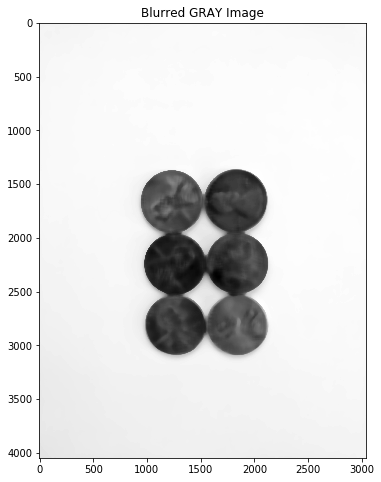

In [40]:
blur_gray_coins = cv2.cvtColor( blur_coins ,  cv2.COLOR_BGR2GRAY )

plt.figure(figsize = (15 , 8 ))

plt.title('Blurred GRAY Image' )
plt.imshow(blur_gray_coins , cmap = 'gray' )

# Applying Threshold

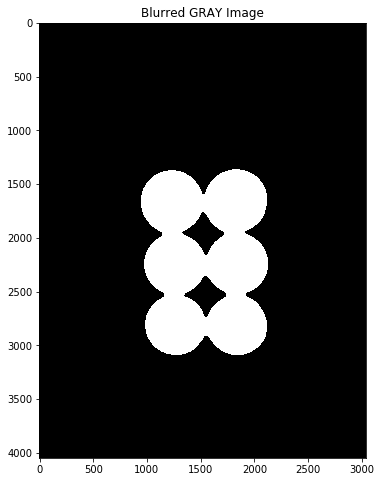

In [41]:
ret , blur_gray_thresh_coins = cv2.threshold( blur_gray_coins , 0 , 255 , cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

plt.figure(figsize = (15 , 8 ))

plt.title('Blurred GRAY Image' ) 
plt.imshow(blur_gray_thresh_coins , cmap = 'gray' )

# Taking Contours

In [42]:
contours , hierarchy =  cv2.findContours( blur_gray_thresh_coins.copy() , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE )  

for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours( coins , contours , i , 255 , 10  )
        


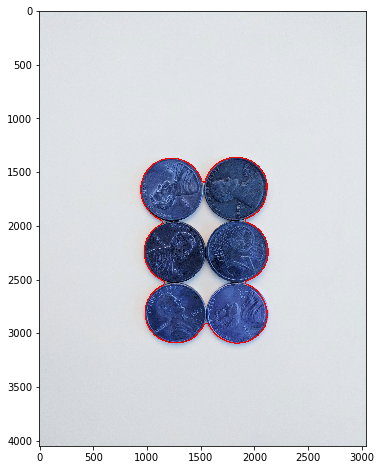

In [43]:
plt.figure(figsize = (15 , 8 ))
plt.imshow(coins , cmap = 'gray')

- The Images are not clearly segmented because they are close to each other( Inner part of the coins are not highlighted )

# Noise Removal

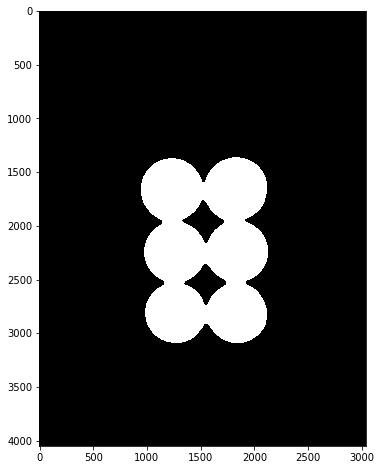

In [45]:
kernel = np.ones( (3,3) , np.uint8 )

opening = cv2.morphologyEx( blur_gray_thresh_coins , cv2.MORPH_OPEN , kernel , iterations = 2 )

plt.figure(figsize = (15 , 8 ))
plt.imshow(opening , cmap = 'gray')

- still we are unable to seperate the coins

# Distance Transformation

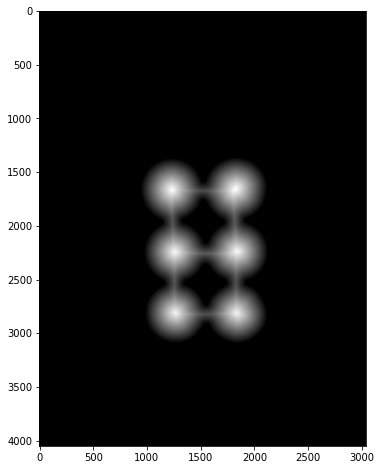

In [46]:
dist_transform = cv2.distanceTransform( opening , cv2.DIST_L2 , 5 )

plt.figure(figsize = (15 , 8 ))
plt.imshow(dist_transform , cmap = 'gray')

# Dilation to find out the sure background region

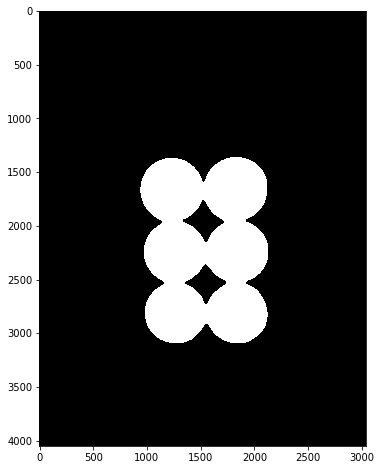

In [48]:
sure_bg = cv2.dilate( opening , kernel , iterations = 3 )

plt.figure(figsize = (15 , 8 ))
plt.imshow(sure_bg , cmap = 'gray')

# Threshold on distance transformation to find out sure foreground picture 

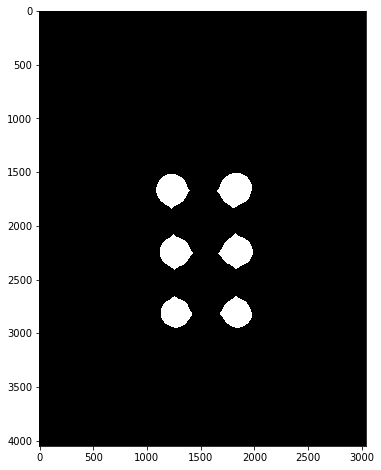

In [47]:
ret , sure_fg = cv2.threshold(  dist_transform , 0.5*dist_transform.max() , 255 , 0 )

plt.figure(figsize = (15 , 8 ))
plt.imshow(sure_fg , cmap = 'gray')

# unknown region

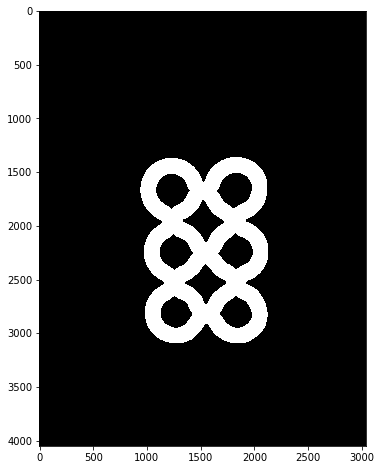

In [49]:
sure_fg = np.uint8( sure_fg )
unknown = cv2.subtract( sure_bg , sure_fg )

plt.figure(figsize = (15 , 8 ))
plt.imshow(unknown , cmap = 'gray')

# Algorithm

In [50]:
ret , markers = cv2.connectedComponents( sure_fg )

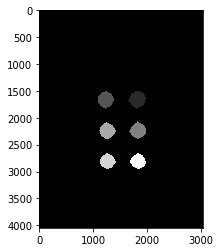

In [51]:
plt.imshow(markers , cmap = 'gray')

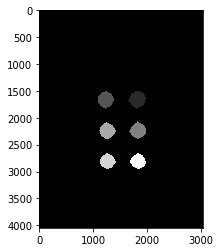

In [52]:
markers = markers + 1 
plt.imshow(markers , cmap = 'gray')

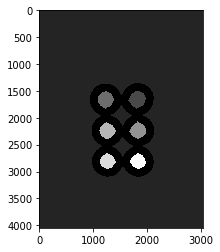

In [53]:
markers[unknown == 255 ] = 0 

plt.imshow(markers , cmap = 'gray')

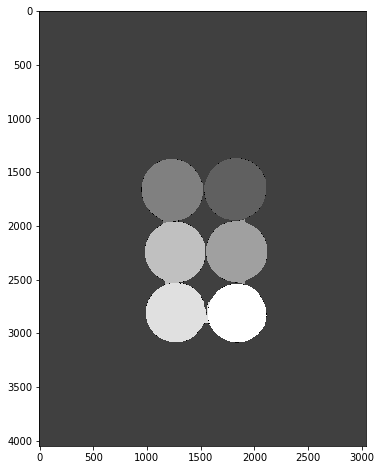

In [54]:
markers = cv2.watershed( coins , markers )

plt.figure(figsize = (15 , 8 ))
plt.imshow(markers , cmap = 'gray')

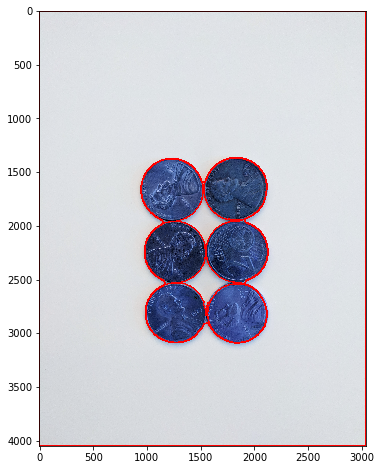

In [55]:
contours , hierarchy =  cv2.findContours( markers.copy() , cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE )  

for i in range(len(contours)) :
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours( coins , contours , i , 255 , 10  )
        
plt.figure(figsize = (15 , 8 ))
plt.imshow(coins , cmap = 'gray')

In [56]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [-1,  7, -1, -1]]], dtype=int32)

- The Images are clearly segmented